# Classical Quantile Regression

### QuantReg via statsmodels’ (Food / Income Example)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


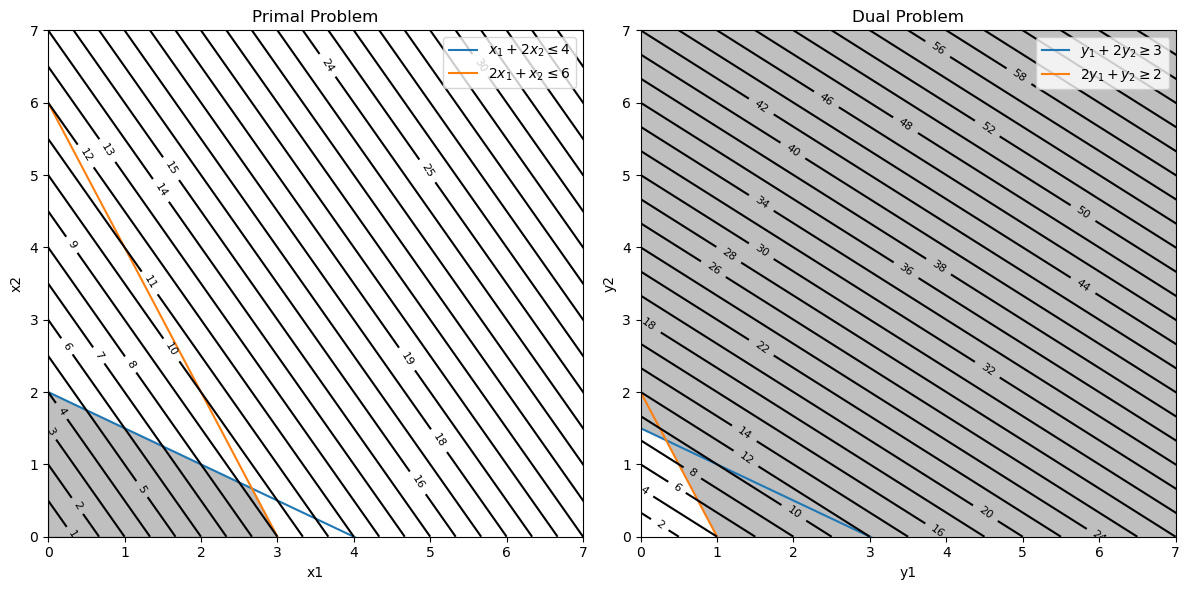

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set the range for the variables.
x = np.linspace(0, 10, 400)
y = np.linspace(0, 10, 400)
X, Y = np.meshgrid(x, y)

# Primal constraints
primal_1 = (4 - x)/2
primal_2 = 6 - 2*x

# Dual constraints
dual_1 = (3 - y)/2
dual_2 = 2 - 2*y

# Objective functions for contour plots
Z = 3*X + 2*Y
W = 4*X + 6*Y

plt.figure(figsize=(12, 6))

# Primal Plot
plt.subplot(1, 2, 1)
plt.plot(x, primal_1, label=r'$x_1 + 2x_2 \leq 4$')
plt.plot(x, primal_2, label=r'$2x_1 + x_2 \leq 6$')
plt.xlim((0, 7))
plt.ylim((0, 7))
plt.fill_between(x, 0, np.minimum(primal_1, primal_2), where=(primal_2>=0) & (primal_1>=0), color='gray', alpha=0.5)
plt.title('Primal Problem')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
contour = plt.contour(X, Y, Z, 50, colors='black')
plt.clabel(contour, inline=1, fontsize=8)

# Contour plot for primal objective
# Dual Plot
plt.subplot(1, 2, 2)
plt.plot(y, dual_1, label=r'$y_1 + 2y_2 \geq 3$')
plt.plot(y, dual_2, label=r'$2y_1 + y_2 \geq 2$')
plt.xlim((0, 7))
plt.ylim((0, 7))
plt.title('Dual Problem')
plt.xlabel('y1')
plt.ylabel('y2')
plt.fill_between(y, 7, np.minimum(dual_1, dual_2), where=(dual_2<=7) & (dual_1<=7), color='gray', alpha=0.5)
plt.legend()

# Contour plot for dual objective
contour = plt.contour(X, Y, W, 50, colors='black')
plt.clabel(contour, inline=1, fontsize=8)


plt.tight_layout()
plt.show()


In [2]:
from scipy.optimize import linprog

# Primal
c_primal = [-3, -2]  # Coefficients for the objective function (negative for maximization)
A_primal = [[1, 2], [2, 1]]  # Coefficients for the inequalities
b_primal = [4, 6]  # Right-hand side of the inequalities

primal_result = linprog(c=c_primal, A_ub=A_primal, b_ub=b_primal, method='highs')

# Dual
c_dual = [4, 6]
A_dual = [[-1, -2], [-2, -1]]
b_dual = [-3, -2]

dual_result = linprog(c=c_dual, A_ub=A_dual, b_ub=b_dual, method='highs')

# Display results
print("Primal solution:", primal_result.x)
print("Primal objective value:", -primal_result.fun)
print("Dual solution:", dual_result.x)
print("Dual objective value:", dual_result.fun)

# Check complementary slackness
for i, x in enumerate(primal_result.x):
    if x > 0:
        print(f"x_{i+1} is positive and the dual constraint {i+1} is binding (satisfied as equality):", abs(dual_result.slack[i]) < 1e-6)

for i, y in enumerate(dual_result.x):
    if y > 0:
        print(f"y_{i+1} is positive and the primal constraint {i+1} is binding (satisfied as equality):", abs(primal_result.slack[i]) < 1e-6)


Primal solution: [2.66666667 0.66666667]
Primal objective value: 9.333333333333334
Dual solution: [0.33333333 1.33333333]
Dual objective value: 9.333333333333334
x_1 is positive and the dual constraint 1 is binding (satisfied as equality): True
x_2 is positive and the dual constraint 2 is binding (satisfied as equality): True
y_1 is positive and the primal constraint 1 is binding (satisfied as equality): True
y_2 is positive and the primal constraint 2 is binding (satisfied as equality): True


In [3]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

data = sm.datasets.engel.load_pandas().data
data.head()
#https://www.statsmodels.org/dev/examples/notebooks/generated/quantile_regression.html

,income,foodexp
0,420.157651,255.839425
1,541.411707,310.958667
2,901.157457,485.680014
3,639.080229,402.997356
4,750.875606,495.560775


In [4]:
data.tail()

,income,foodexp
230,440.517424,306.519079
231,541.200597,299.199328
232,581.359892,468.000798
233,743.077243,522.601906
234,1057.676711,750.320163


In [5]:
#The LAD model is a special case of quantile regression where q=0.5
mod = smf.quantreg("foodexp ~ income", data)
res = mod.fit(q=0.5)
print(res.summary())

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                         QuantReg Regression Results                          
Dep. Variable:                foodexp   Pseudo R-squared:               0.6206
Model:                       QuantReg   Bandwidth:                       64.51
Method:                 Least Squares   Sparsity:                        209.3
Date:                Fri, 01 Dec 2023   No. Observations:                  235
Time:                        00:58:29   Df Residuals:                      233
                          

In [6]:
quantiles = np.arange(0.1, 0.91, 0.1)


def fit_model(q):
    res = mod.fit(q=q)
    return [q, res.params["Intercept"], res.params["income"]] + res.conf_int().loc[
        "income"
    ].tolist()


models = [fit_model(x) for x in quantiles]
models = pd.DataFrame(models, columns=["q", "a", "b", "lb", "ub"])

ols = smf.ols("foodexp ~ income", data).fit()
ols_ci = ols.conf_int().loc["income"].tolist()
ols = dict(
    a=ols.params["Intercept"], b=ols.params["income"], lb=ols_ci[0], ub=ols_ci[1]
)

print(models)
print(ols)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Text(0, 0.5, 'Food expenditure')

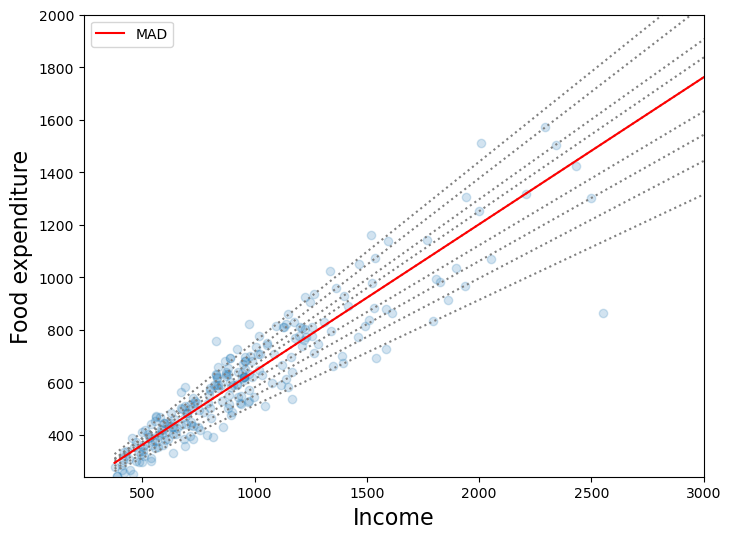

In [7]:
x = np.arange(data.income.min(), data.income.max(), 50)
get_y = lambda a, b: a + b * x

fig, ax = plt.subplots(figsize=(8, 6))

for i in range(models.shape[0]):
    y = get_y(models.a[i], models.b[i])
    ax.plot(x, y, linestyle="dotted", color="grey")

y = get_y(models.a[4], models.b[4])

ax.plot(x, y, color="red", label="MAD")
ax.scatter(data.income, data.foodexp, alpha=0.2)
ax.set_xlim((240, 3000))
ax.set_ylim((240, 2000))
legend = ax.legend()
ax.set_xlabel("Income", fontsize=16)
ax.set_ylabel("Food expenditure", fontsize=16)

### Linear Programming Approach

In [8]:
engle_path = 'https://raw.githubusercontent.com/alfredgalichon/VQR/master/engle-data/'
engle_data = pd.read_csv(engle_path+ 'engel.csv')

engle_data.head()

,income,food,clothing,housing,heating/lightening,tools,Education,Public safety,health,Services
0,835.94,576.28,129.34,78.32,46.80,0.0,0.0,0.0,5.2,NaN
1,873.44,631.80,83.00,79.80,73.84,0.0,5.0,0.0,0.0,NaN
2,951.44,608.64,134.00,108.00,78.00,0.0,5.0,0.0,17.8,NaN
3,473.00,301.00,40.00,76.00,46.00,0.0,0.0,2.0,8.0,NaN
4,601.00,378.00,65.00,84.00,50.00,0.0,0.0,6.0,18.0,NaN


In [9]:
pip install gurobipy==10.0.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 4.6 MB/s eta 0:00:0000:010:01m
  Attempting uninstall: gurobipy
    Found existing installation: gurobipy 11.0.0
    Uninstalling gurobipy-11.0.0:
      Successfully uninstalled gurobipy-11.0.0

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [10]:
import gurobipy as grb
from gurobipy import GRB

In [11]:
import sys
print(sys.executable)

/Users/Eric/opt/anaconda3/envs/dsm/bin/python


In [12]:
income = np.array(engle_data['income'])
food = np.array(engle_data['food'])
housing = np.array(engle_data['housing'])
nbi=len(income)
X_i_k = np.array([np.ones(nbi),income]).T
Y = np.array([food,housing]).T
_,nbk = X_i_k.shape
qr_lp=grb.Model()
τ = 0.5
P = qr_lp.addMVar(shape=nbi, name="P")
β = qr_lp.addMVar(shape=nbk, name="β", lb=-grb.GRB.INFINITY )
qr_lp.setObjective(np.ones(nbi) @ P + (1-τ) * (np.ones(nbi) @ X_i_k) @ β, grb.GRB.MINIMIZE)
qr_lp.addConstr(P  + X_i_k @ β >= food)
qr_lp.optimize()

βhat = qr_lp.getAttr('x')[-nbk:]
βhat

Set parameter Username
Academic license - for non-commercial use only - expires 2024-07-09
Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[rosetta2])

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 235 rows, 237 columns and 705 nonzeros
Model fingerprint: 0x2e1ba335
Coefficient statistics:
  Matrix range     [1e+00, 5e+03]
  Objective range  [1e+00, 1e+05]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+02, 2e+03]
Presolve time: 0.00s
Presolved: 235 rows, 237 columns, 705 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0      handle free variables                          0s
     223    8.2118037e+04   0.000000e+00   0.000000e+00      0s

Solved in 223 iterations and 0.01 seconds (0.00 work units)
Optimal objective  8.211803659e+04


[81.48614818083601, 0.560174688436782]

In [13]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import scipy.sparse as spr

In [14]:
τ = 0.5
model = smf.quantreg('food ~ income', engle_data)
print(model.fit(q=τ).summary())

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                         QuantReg Regression Results                          
Dep. Variable:                   food   Pseudo R-squared:               0.6205
Model:                       QuantReg   Bandwidth:                       64.51
Method:                 Least Squares   Sparsity:                        209.3
Date:                Fri, 01 Dec 2023   No. Observations:                  235
Time:                        00:58:35   Df Residuals:                      233
                          

In [15]:
Y_i_1 = food.reshape((-1,1))
nbt=21
τ_t_1 = np.linspace(0,1,nbt).reshape((-1,1))
A = spr.kron(spr.identity(nbt),X_i_k.T) / nbi
obj = np.kron(np.ones((nbt,1)),Y_i_1).T / nbi
xbar_1_k = X_i_k.mean(axis = 0).reshape((1,-1))
rhs = ((1-τ_t_1) * xbar_1_k).flatten()
qrs_lp=grb.Model()
qrs_lp.setParam( 'OutputFlag', False )
v = qrs_lp.addMVar(shape=nbi*nbt, name="v",lb=0,ub=1)
qrs_lp.setObjective(obj @ v , grb.GRB.MAXIMIZE)
qrs_lp.addConstr(A @ v == rhs)
qrs_lp.optimize()

βqrs_t_k = np.array(qrs_lp.getAttr('pi')).reshape((nbt,nbk))
βqrs_t_k[10,:]

array([81.48614818,  0.56017469])

# One-Dimensional Vector Quantile Regression

In [16]:
D_t_t = spr.diags([1, -1], [ 0, -1], shape=(nbt, nbt))

U_t_1 = np.linalg.inv(D_t_t.toarray()) @ np.ones( (nbt,1)) 
μ_t_1 = D_t_t.T @ (np.ones((nbt,1)) - τ_t_1)

A1 = spr.kron(spr.identity(nbt),X_i_k.T)
A2 = spr.kron(np.array(np.repeat(1,nbt)),spr.identity(nbi))
A = spr.vstack([A1, A2])
rhs = np.concatenate( [(μ_t_1 * xbar_1_k).flatten(), np.ones(nbi)/nbi]) 
obj = np.kron(U_t_1, Y_i_1).T
vqr_lp=grb.Model()
pi = vqr_lp.addMVar(shape=nbi*nbt, name="pi")
vqr_lp.setParam( 'OutputFlag', False )
vqr_lp.setObjective( obj @ pi, grb.GRB.MAXIMIZE)
vqr_lp.addConstr(A @ pi == rhs)
vqr_lp.optimize()

ϕ_t_k = np.array(vqr_lp.getAttr('pi'))[0:(nbt*nbk)].reshape((nbt,nbk))

βvqr_t_k = D_t_t.toarray() @ ϕ_t_k

βvqr_t_k[10,:]

array([81.48614818,  0.56017469])